In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/midsem.csv')

1.Check whether there is any null-entry in the dataset or not.


In [ ]:


df. isnull()
df.isnull().sum()

,0
Unnamed: 0,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0


In [ ]:
df.describe()


,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


2.How many entries correspond to gamma class, and how many entries correspond to hadron class?


In [ ]:

df['class'].value_counts()

,count
class,
g,12332
h,6688


3. 1D histograms for fLength, one for gamma class, one for hadron class.

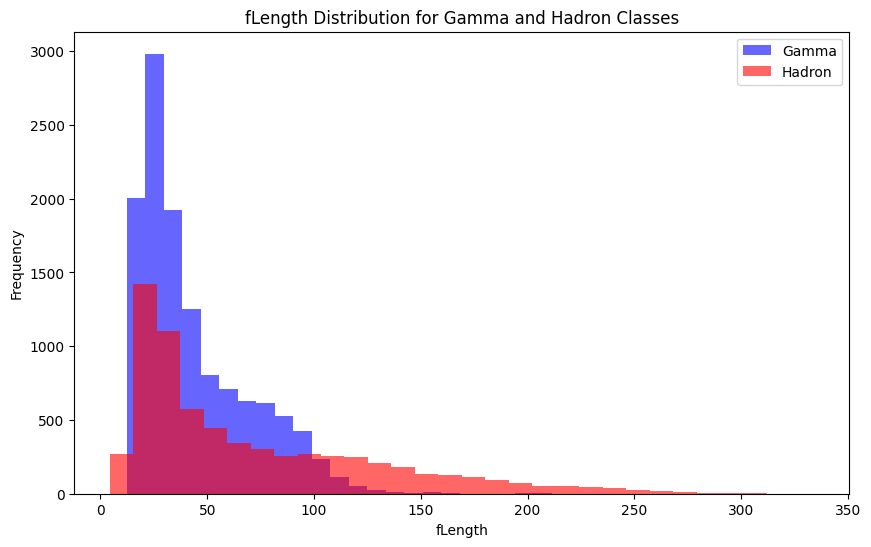

In [ ]:

import matplotlib.pyplot as plt

gamma_data = df[df['class'] == 'g']['fLength']
hadron_data = df[df['class'] != 'g']['fLength']  # Assuming non-'g' is hadron

plt.figure(figsize=(10, 6))

# Gamma histogram
plt.hist(gamma_data, bins=30, alpha=0.6, color='blue', label='Gamma')

# Hadron histogram
plt.hist(hadron_data, bins=30, alpha=0.6, color='red', label='Hadron')

# Adding labels and title
plt.title('fLength Distribution for Gamma and Hadron Classes')
plt.xlabel('fLength')
plt.ylabel('Frequency')

plt.legend()
plt.show()


4.Based on the plot, a reasonable value for X to reject as much hadron as possible while retaining the gamma class would likely be around X = 45

Reasoning:
- Most of the gamma distribution appears to be concentrated below fLength = 45, meaning we could keep a significant portion of the gamma data with this cut.
- Beyond fLength = 45 , the hadron distribution begins to overlap more significantly with the gamma distribution.


5. Correlation Matrix

In [ ]:
# import pandas as pd

# def corr_matrix_without_class(df, class_column):
#     """
#     Calculates the correlation matrix for a DataFrame, excluding a specified class column.

#     Args:
#         df (pd.DataFrame): The DataFrame containing the data.
#         class_column (str): The name of the column containing the class labels.

#     Returns:
#         pd.DataFrame: The correlation matrix.
#     """

#     # Create a copy of the DataFrame to avoid modifying the original
#     df_copy = df.copy()

#     # Drop the class column
#     df_copy.drop(['class'], axis=1, inplace=True)

#     # Calculate the correlation matrix
#     corr_matrix = df_copy.corr()

# #     return corr_matrix


# # corr_matrix = corr_matrix_without_class(df, 'class')
# # print(corr_matrix)

# import pandas as pd

# def corr_matrix_without_class(df, class_column):
#     """
#     Calculates the correlation matrix for a DataFrame, excluding a specified class column.

#     Args:
#         df (pd.DataFrame): The DataFrame containing the data.
#         class_column (str): The name of the column containing the class labels.

#     Returns:
#         pd.DataFrame: The correlation matrix.
#     """

#     # Create a copy of the DataFrame to avoid modifying the original
#     df_copy = df.copy()

#     # Check if the class column exists before dropping
#     if class in df_copy.columns:
#         # Drop the class column
#         df_copy.drop([class_column], axis=1, inplace=True)

#         # Calculate the correlation matrix
#         corr_matrix = df_copy.corr()

#         return corr_matrix
#     else:
#         print(f"Column '{class_column}' not found in DataFrame.")
#         return None


# corr_matrix = corr_matrix_without_class(df, 'class')
# print(corr_matrix)


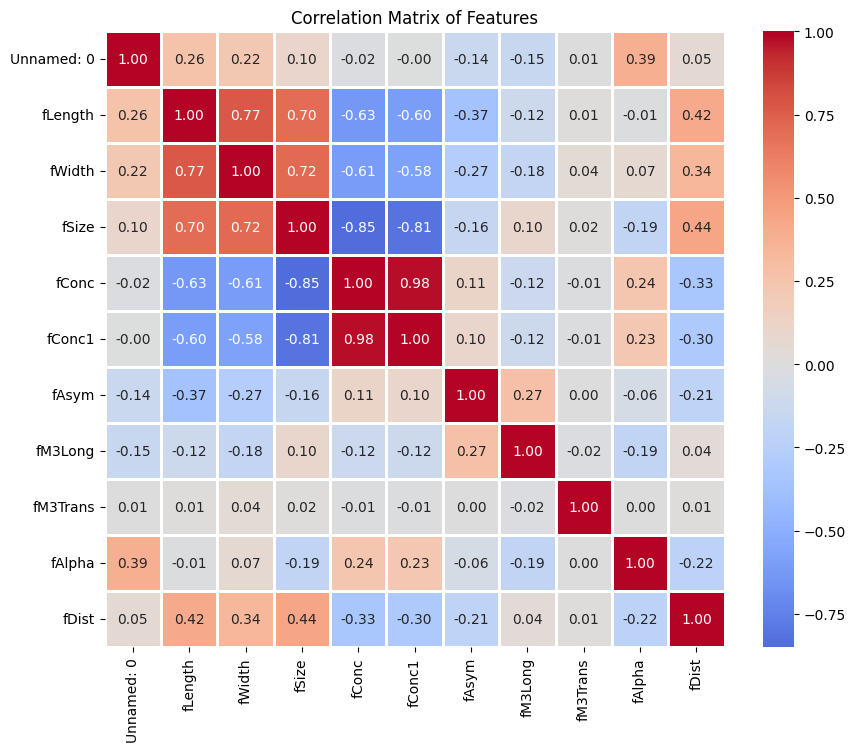

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Find the highest positive, highest negative, and closest to zero correlation pairs
corr_unstacked = corr_matrix.unstack()
sorted_corr = corr_unstacked.sort_values(ascending=False)

# Filter out self-correlations (1.0) and look for pairs with the highest correlations
highest_positive = sorted_corr[(sorted_corr < 1) & (sorted_corr > 0)].idxmax()
highest_negative = sorted_corr.idxmin()
uncorrelated_pair = sorted_corr[(sorted_corr > -0.1) & (sorted_corr < 0.1) & (sorted_corr != 0)].idxmin()

print(f"Highest positive correlation: {highest_positive}")
print(f"Highest negative correlation: {highest_negative}")
print(f"Most uncorrelated pair: {uncorrelated_pair}")


Highest positive correlation: ('fConc', 'fConc1')
Highest negative correlation: ('fConc', 'fSize')
Most uncorrelated pair: ('fAsym', 'fAlpha')


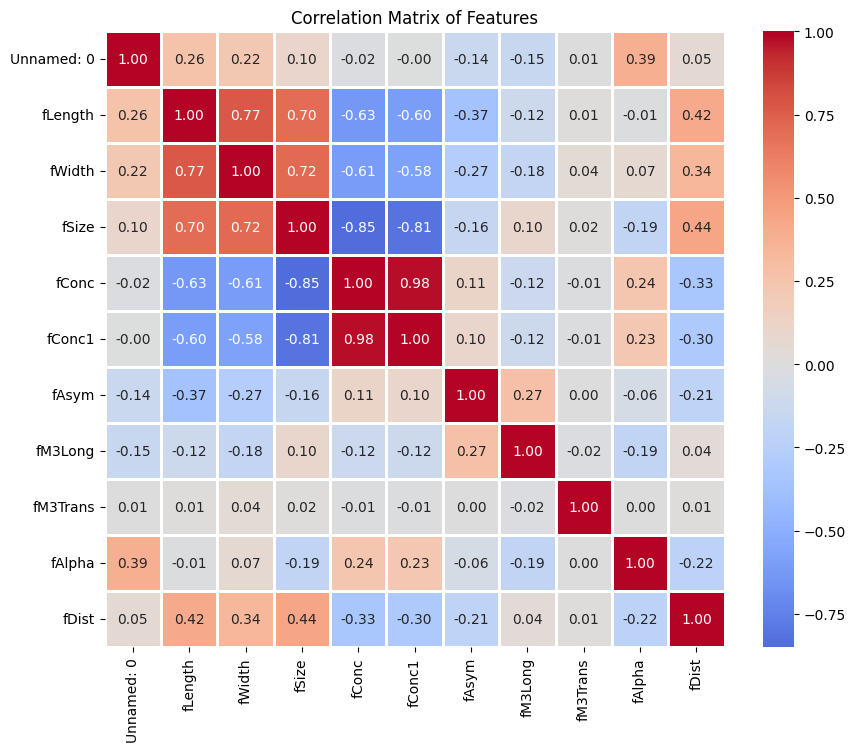

Highest positive correlation: ('fConc', 'fConc1')
Highest negative correlation: ('fConc', 'fSize')
Most uncorrelated pair: ('fAsym', 'fAlpha')


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Find the highest positive, highest negative, and closest to zero correlation pairs
corr_unstacked = corr_matrix.unstack()
sorted_corr = corr_unstacked.sort_values(ascending=False)

# Filter out self-correlations (1.0) and look for pairs with the highest correlations
highest_positive = sorted_corr[(sorted_corr < 1) & (sorted_corr > 0)].idxmax()
highest_negative = sorted_corr.idxmin()
uncorrelated_pair = sorted_corr[(sorted_corr > -0.1) & (sorted_corr < 0.1) & (sorted_corr != 0)].idxmin()

print(f"Highest positive correlation: {highest_positive}")
print(f"Highest negative correlation: {highest_negative}")
print(f"Most uncorrelated pair: {uncorrelated_pair}")

6. Diving dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# training (70%) and remaining (30%) for validation and test
train_data, temp_data = train_test_split(df, test_size=0.30, random_state=42)
# remaining data into validation (15%) and test (15%)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")



Training set size: 13314
Validation set size: 2853
Test set size: 2853


In [ ]:
df.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


7.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import metrics

# Preparing the data (using your splits from before)
X = df.drop(columns=['class'])  # Feature columns
y = df['class'].map({'g': 1, 'h': 0})  # Binary encoding: gamma=1, hadron=0

# Train, validation, and test splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Define the DNN model with more than one hidden layer
dnn_model = Sequential()
dnn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model with RMSprop optimizer
dnn_model.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=[metrics.Precision(), metrics.Recall(), 'accuracy'])

# Train the model
history_dnn = dnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=50, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5752 - loss: 105.1230 - precision: 0.7239 - recall: 0.5574 - val_accuracy: 0.8065 - val_loss: 9.3491 - val_precision: 0.8593 - val_recall: 0.8408
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6991 - loss: 44.5169 - precision: 0.8053 - recall: 0.7007 - val_accuracy: 0.8142 - val_loss: 9.1357 - val_precision: 0.8902 - val_recall: 0.8155
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7398 - loss: 27.5184 - precision: 0.8347 - recall: 0.7522 - val_accuracy: 0.5359 - val_loss: 104.2115 - val_precision: 1.0000 - val_recall: 0.2878
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7477 - loss: 19.0574 - precision: 0.8447 - recall: 0.7508 - val_accuracy: 0.6516 - val_loss: 85.3795 - val_precision: 0.6516 - val_recall: 1.0000
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7493 - loss: 13.9349 - precision: 0.8322 - recall: 0.7597 - val_accuracy: 0.8237 - val

In [ ]:

logistic_model = Sequential()
logistic_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

logistic_model.compile(optimizer=RMSprop(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=[metrics.Precision(), metrics.Recall(), 'accuracy'])

# Train the model
history_logistic = logistic_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                                      epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6317 - loss: 2869.9189 - precision_1: 0.6426 - recall_1: 0.9740 - val_accuracy: 0.6032 - val_loss: 1156.2719 - val_precision_1: 0.6339 - val_recall_1: 0.9258
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5004 - loss: 667.9973 - precision_1: 0.5880 - recall_1: 0.7316 - val_accuracy: 0.2632 - val_loss: 91.2301 - val_precision_1: 0.2712 - val_recall_1: 0.0775
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2559 - loss: 79.3230 - precision_1: 0.3403 - recall_1: 0.1495 - val_accuracy: 0.3018 - val_loss: 45.7371 - val_precision_1: 0.4222 - val_recall_1: 0.1942
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3376 - loss: 37.1009 - precision_1: 0.4740 - recall_1: 0.2360 - val_accuracy: 0.4925 - val_loss: 13.2308 - val_precision_1: 0.6293 - val_recall_1: 0.5379
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5771 - loss: 9.1620 - precision_1: 0.7354 - recall_1: 0.5296

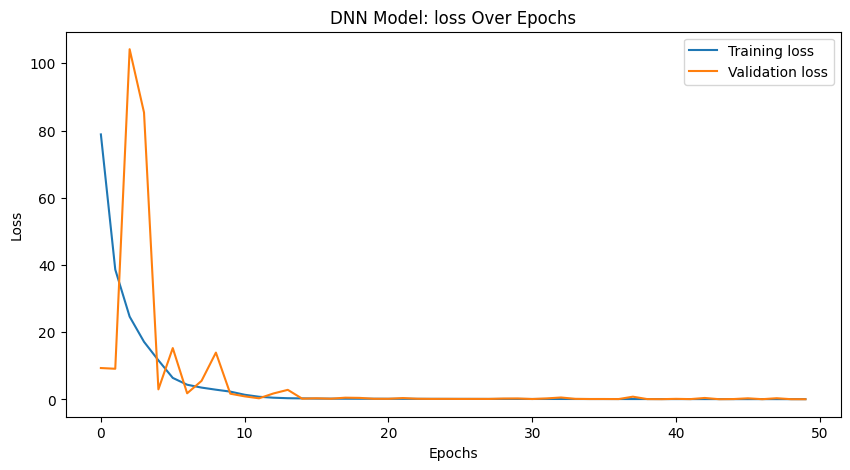

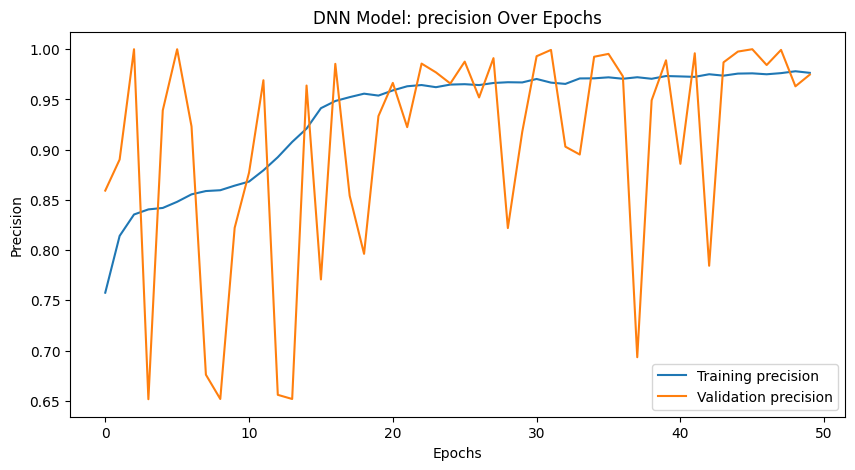

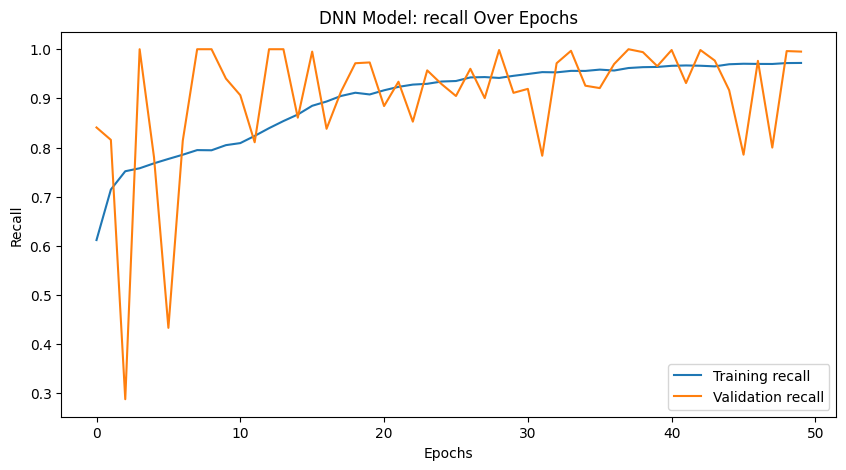

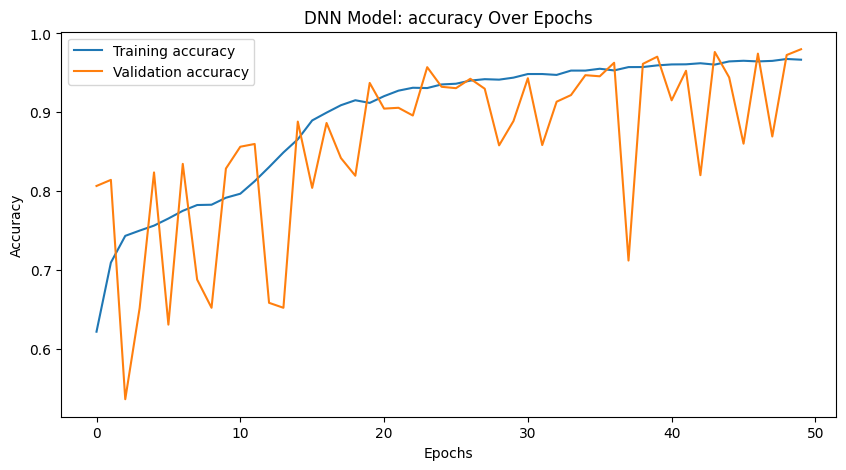

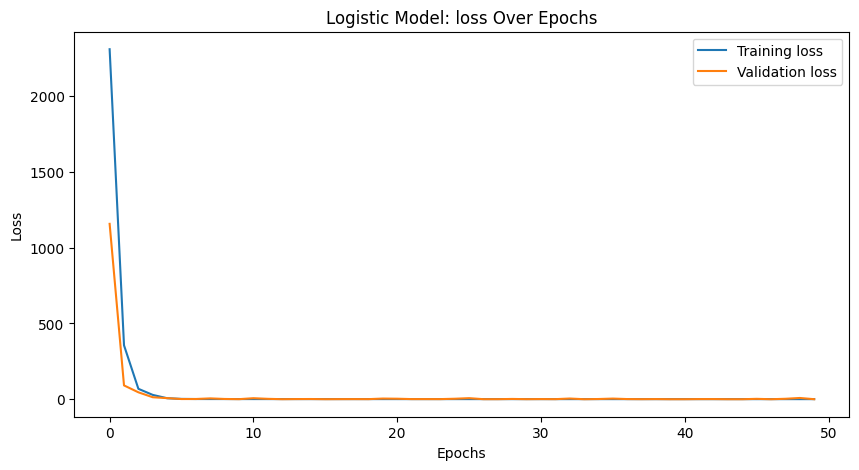

KeyError: 'precision'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot function for metrics
def plot_metrics(history, model_name):
    # List of metrics to plot
    metrics_to_plot = ['loss', 'precision', 'recall', 'accuracy']

    for metric in metrics_to_plot:
        plt.figure(figsize=(10, 5))
        plt.plot(history.history[metric], label=f'Training {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(f'{model_name}: {metric} Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.show()

# Plot metrics for DNN model
plot_metrics(history_dnn, 'DNN Model')

# Plot metrics for Logistic model
plot_metrics(history_logistic, 'Logistic Model')


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


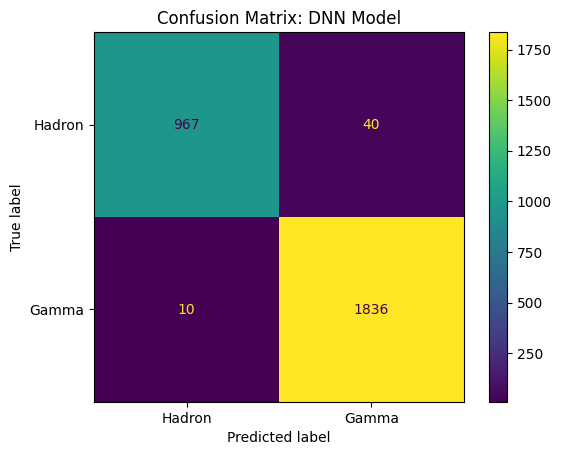

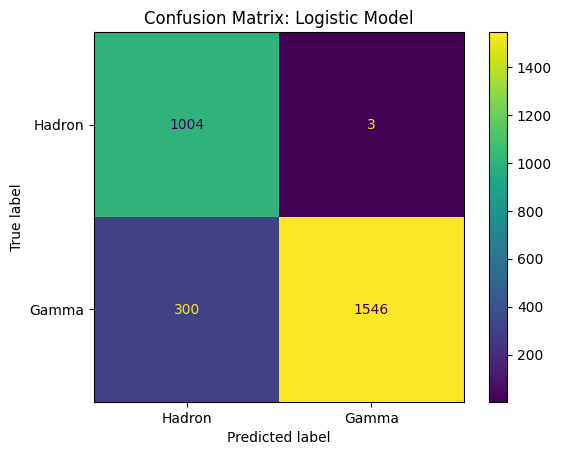

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set for DNN
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
cm_dnn = confusion_matrix(y_test, y_pred_dnn)

# Predict on the test set for Logistic
y_pred_logistic = (logistic_model.predict(X_test) > 0.5).astype("int32")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix for DNN
ConfusionMatrixDisplay(cm_dnn, display_labels=['Hadron', 'Gamma']).plot()
plt.title('Confusion Matrix: DNN Model')
plt.show()

# Plot confusion matrix for Logistic model
ConfusionMatrixDisplay(cm_logistic, display_labels=['Hadron', 'Gamma']).plot()
plt.title('Confusion Matrix: Logistic Model')
plt.show()


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


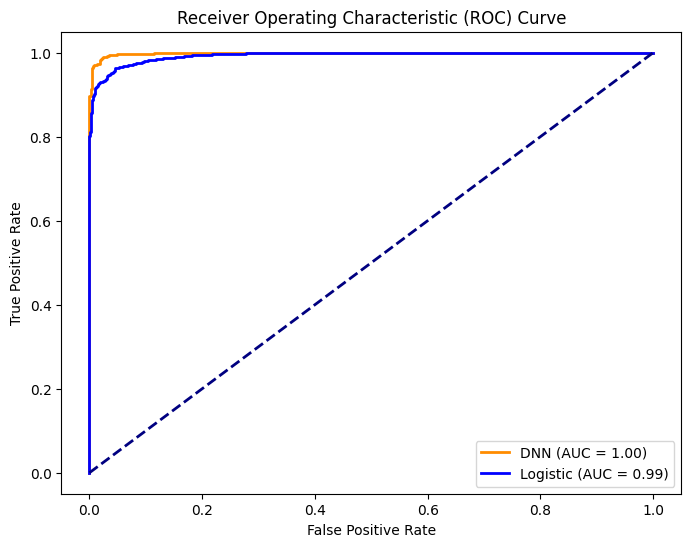

DNN model is performing better based on AUC.


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set for DNN and Logistic models
y_pred_dnn_prob = dnn_model.predict(X_test)
y_pred_logistic_prob = logistic_model.predict(X_test)

# Calculate the ROC curve and AUC for DNN
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, y_pred_dnn_prob)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

# Calculate the ROC curve and AUC for Logistic
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic_prob)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curves for both models on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='darkorange', lw=2, label='DNN (AUC = %0.2f)' % roc_auc_dnn)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic (AUC = %0.2f)' % roc_auc_logistic)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compare AUC and determine which model is better
if roc_auc_dnn > roc_auc_logistic:
    print("DNN model is performing better based on AUC.")
else:
    print("Logistic model is performing better based on AUC.")



In [ ]:
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Obtain accuracy score, F1 score, precision, and recall for DNN-model and logistic-model.

# Evaluate the DNN model on the test set
dnn_loss, dnn_precision, dnn_recall, dnn_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
dnn_f1 = f1_score(y_test, y_pred_dnn)


# Evaluate the logistic model on the test set
logistic_loss, logistic_precision, logistic_recall, logistic_accuracy = logistic_model.evaluate(X_test, y_test, verbose=0)
logistic_f1 = f1_score(y_test, y_pred_logistic)

print("DNN Model:")
print(f"Accuracy: {dnn_accuracy:.4f}")
print(f"F1 Score: {dnn_f1:.4f}")
print(f"Precision: {dnn_precision:.4f}")
print(f"Recall: {dnn_recall:.4f}")

print("\nLogistic Model:")
print(f"Accuracy: {logistic_accuracy:.4f}")
print(f"F1 Score: {logistic_f1:.4f}")
print(f"Precision: {logistic_precision:.4f}")
print(f"Recall: {logistic_recall:.4f}")


DNN Model:
Accuracy: 0.9825
F1 Score: 0.9866
Precision: 0.9787
Recall: 0.9946

Logistic Model:
Accuracy: 0.8938
F1 Score: 0.9108
Precision: 0.9981
Recall: 0.8375


looking at this DNN model is performing better.


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


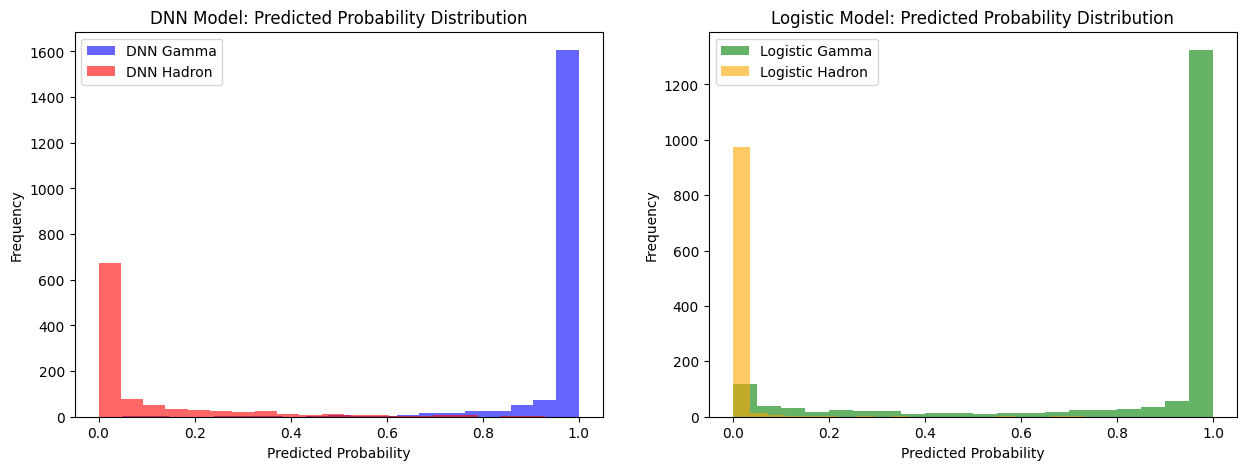

In [ ]:
# Plot 1D histogram of pred for gamma class and hadron class for DNN model and logistic model.

import matplotlib.pyplot as plt
# Predict probabilities for DNN and Logistic models
y_pred_prob_dnn = dnn_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict(X_test)

# Separate predictions for gamma and hadron classes for both models
y_pred_prob_dnn_gamma = y_pred_prob_dnn[y_test == 1]
y_pred_prob_dnn_hadron = y_pred_prob_dnn[y_test == 0]
y_pred_prob_logistic_gamma = y_pred_prob_logistic[y_test == 1]
y_pred_prob_logistic_hadron = y_pred_prob_logistic[y_test == 0]

# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot DNN model histograms
axs[0].hist(y_pred_prob_dnn_gamma, bins=20, alpha=0.6, color='blue', label='DNN Gamma')
axs[0].hist(y_pred_prob_dnn_hadron, bins=20, alpha=0.6, color='red', label='DNN Hadron')
axs[0].set_title('DNN Model: Predicted Probability Distribution')
axs[0].set_xlabel('Predicted Probability')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot Logistic model histograms
axs[1].hist(y_pred_prob_logistic_gamma, bins=20, alpha=0.6, color='green', label='Logistic Gamma')
axs[1].hist(y_pred_prob_logistic_hadron, bins=20, alpha=0.6, color='orange', label='Logistic Hadron')
axs[1].set_title('Logistic Model: Predicted Probability Distribution')
axs[1].set_xlabel('Predicted Probability')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.show()


In [ ]:

# Predict on the test set for DNN with the new threshold
y_pred_dnn_new = (dnn_model.predict(X_test) > 0.8).astype("int32")
precision_dnn_new = precision_score(y_test, y_pred_dnn_new)

# Predict on the test set for Logistic with the new threshold
y_pred_logistic_new = (logistic_model.predict(X_test) > 0.8).astype("int32")
precision_logistic_new = precision_score(y_test, y_pred_logistic_new)


print("DNN Model with new threshold (ypred > 0.8):")
print(f"Precision: {precision_dnn_new:.4f}")

print("\nLogistic Model with new threshold (ypred > 0.8):")
print(f"Precision: {precision_logistic_new:.4f}")

# Observation:
# Precision for both models will likely increase with the new threshold (ypred > 0.8)
# because we are being more conservative about classifying a sample as a gamma.
# We are only classifying as gamma if the model is highly confident (ypred > 0.8).
# This will reduce false positives (classifying hadron as gamma), and therefore
# increase precision. However, it could also reduce recall, as we might miss
# some true gamma events.



90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DNN Model with new threshold (ypred > 0.8):
Precision: 0.9972

Logistic Model with new threshold (ypred > 0.8):
Precision: 1.0000
